In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Dataset/USD_Euro.csv")

In [7]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02/28/2025,0.9637,0.9616,0.9653,0.9596,NaN,0.23%
1,02/27/2025,0.9615,0.9538,0.9618,0.9530,NaN,0.82%
2,02/26/2025,0.9537,0.9512,0.9547,0.9498,NaN,0.27%
3,02/25/2025,0.9511,0.9553,0.9564,0.9507,NaN,-0.43%
4,02/24/2025,0.9552,0.9530,0.9567,0.9498,NaN,-0.08%
...,...,...,...,...,...,...,...
3951,01/07/2010,0.6985,0.6940,0.6994,0.6921,NaN,0.68%
3952,01/06/2010,0.6938,0.6960,0.7001,0.6927,NaN,-0.32%
3953,01/05/2010,0.6960,0.6939,0.6971,0.6902,NaN,0.33%
3954,01/04/2010,0.6937,0.6979,0.7015,0.6916,NaN,-0.63%


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df.drop(columns=['Vol.'], inplace=True)

In [9]:
df

,Date,Price,Open,High,Low,Change %
0,2010-01-01,0.6981,0.6980,0.6983,0.6977,-0.06
1,2010-01-04,0.6937,0.6979,0.7015,0.6916,-0.63
2,2010-01-05,0.6960,0.6939,0.6971,0.6902,0.33
3,2010-01-06,0.6938,0.6960,0.7001,0.6927,-0.32
4,2010-01-07,0.6985,0.6940,0.6994,0.6921,0.68
...,...,...,...,...,...,...
3951,2025-02-24,0.9552,0.9530,0.9567,0.9498,-0.08
3952,2025-02-25,0.9511,0.9553,0.9564,0.9507,-0.43
3953,2025-02-26,0.9537,0.9512,0.9547,0.9498,0.27
3954,2025-02-27,0.9615,0.9538,0.9618,0.9530,0.82


In [10]:
features = ['Price', 'Open', 'High', 'Low', 'Change %']
df[features].describe()

,Price,Open,High,Low,Change %
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000
mean,0.848942,0.848905,0.852377,0.845568,0.009525
std,0.078575,0.078653,0.078819,0.078357,0.525213
min,0.674400,0.674400,0.675500,0.669200,-2.950000
25%,0.773200,0.773000,0.776300,0.770200,-0.290000
50%,0.868300,0.868050,0.872200,0.864300,0.000000
75%,0.911525,0.911500,0.915825,0.908925,0.310000
max,1.042100,1.042300,1.048700,1.033900,2.670000


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3956 non-null   datetime64[ns]
 1   Price     3956 non-null   float64       
 2   Open      3956 non-null   float64       
 3   High      3956 non-null   float64       
 4   Low       3956 non-null   float64       
 5   Change %  3956 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 185.6 KB
None


In [12]:
print(df.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64


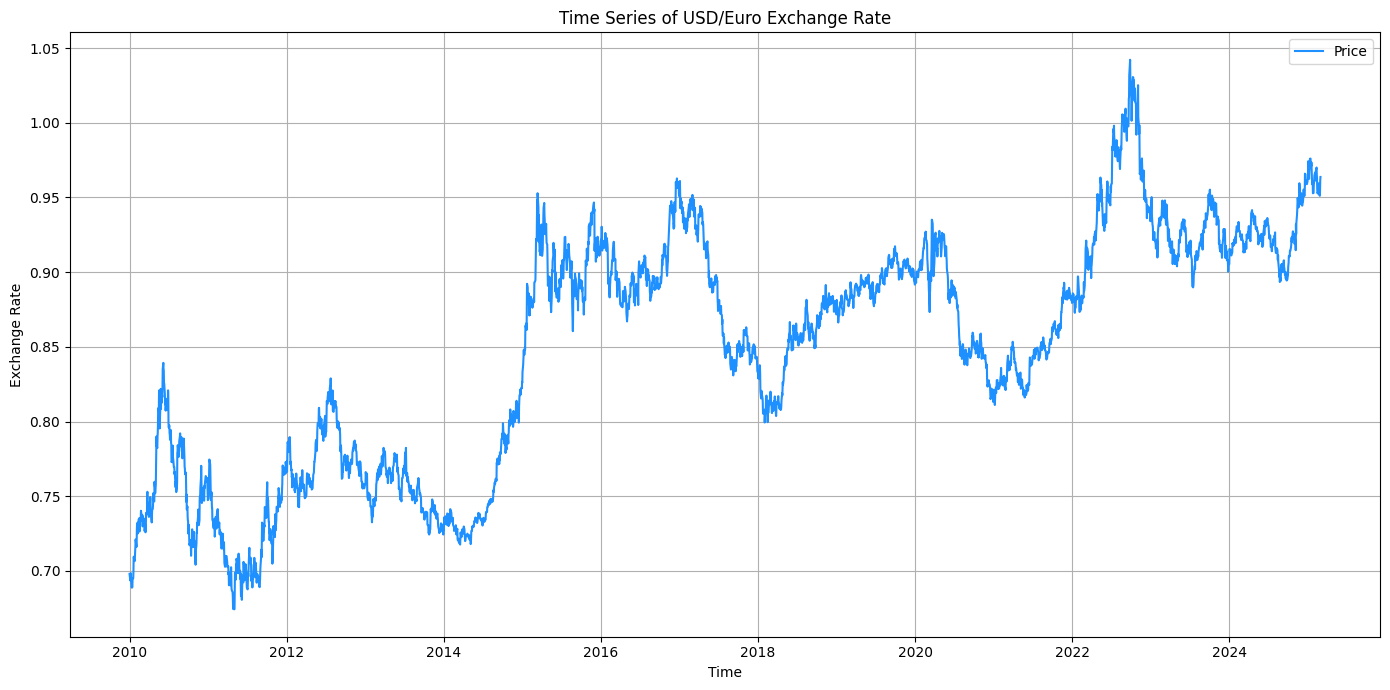

In [14]:
# Vẽ biểu đồ xu hướng giá theo thời gian
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Price', color='dodgerblue')
plt.title("Time Series of USD/Euro Exchange Rate")
plt.xlabel("Time")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
train_size = int(0.8 * len(df))
train_df = df.iloc[:train_size].copy()
test_df = df.iloc[train_size:].copy()

In [ ]:
print(f" Train size: {train_df.shape}")
print(f" Test size: {test_df.shape}")

 Train size: (3164, 6)
 Test size: (792, 6)


In [ ]:
train_df.to_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Train-Test Split Dataset/USD_Euro/train_data_USD_Euro.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Train-Test Split Dataset/USD_Euro/test_data_USD_Euro.csv", index=False)
